<a href="https://colab.research.google.com/github/kahaanpatel5/Stock-Market-Price-Predictor/blob/main/StockPredictorApproach_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
df=yf.download('^BSESN',start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200
2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000
2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400
2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,17615.720703,18000
2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17540.289062,17200
...,...,...,...,...,...,...
2022-07-06,53170.699219,53819.308594,53143.281250,53750.968750,53750.968750,14800
2022-07-07,54146.679688,54254.789062,53927.261719,54178.460938,54178.460938,7500
2022-07-08,54574.429688,54627.140625,54278.769531,54481.839844,54481.839844,7500


In [ ]:
#Added a row for predicting the stock price of next day
data={'Open':0, 'High':0, 'Low':0, 'Close':0, 'Adj Close':0, 'Volume':0}
df=df.append(pd.DataFrame(data, index=['2022-07-13 00:00:00'])) #Add next date to last date

In [ ]:
#Creating a function for making n (n=lags) number of independent variables which will used to predict dependent variable 
def lagit(df, lags):
    names = []
    for i in range(1,lags+1):
        df['Lag_'+str(i)]=df['Close'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [ ]:
#Setting number of independent variables (lags)
lagnames=lagit(df,7)

In [ ]:
#Printing lags
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7']

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
2010-01-04 00:00:00,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000,17558.730469,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06 00:00:00,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400,17686.240234,17558.730469,NaN,NaN,NaN,NaN,NaN
2010-01-07 00:00:00,17701.970703,17733.339844,17566.539062,17615.720703,17615.720703,18000,17701.130859,17686.240234,17558.730469,NaN,NaN,NaN,NaN
2010-01-08 00:00:00,17603.869141,17658.119141,17508.960938,17540.289062,17540.289062,17200,17615.720703,17701.130859,17686.240234,17558.730469,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-07 00:00:00,54146.679688,54254.789062,53927.261719,54178.460938,54178.460938,7500,53750.968750,53134.351562,53234.769531,52907.929688,53018.941406,53026.968750,53177.449219
2022-07-08 00:00:00,54574.429688,54627.140625,54278.769531,54481.839844,54481.839844,7500,54178.460938,53750.968750,53134.351562,53234.769531,52907.929688,53018.941406,53026.968750
2022-07-11 00:00:00,54248.601562,54527.898438,54090.531250,54395.230469,54395.230469,6100,54481.839844,54178.460938,53750.968750,53134.351562,53234.769531,52907.929688,53018.941406
2022-07-12 00:00:00,54219.781250,54236.488281,53824.968750,53886.609375,53886.609375,0,54395.230469,54481.839844,54178.460938,53750.968750,53134.351562,53234.769531,52907.929688


In [ ]:
#Dropping all the rows containing NA values
df.dropna(inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X=df[lagnames]
y=df['Close']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [ ]:
model=LinearRegression()

In [ ]:
#Training the data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(X_test)

                            Lag_1         Lag_2         Lag_3         Lag_4  \
2018-10-12 00:00:00  34001.148438  34760.890625  34299.468750  34474.378906   
2018-10-15 00:00:00  34733.578125  34001.148438  34760.890625  34299.468750   
2018-10-16 00:00:00  34865.101562  34733.578125  34001.148438  34760.890625   
2018-10-17 00:00:00  35162.480469  34865.101562  34733.578125  34001.148438   
2018-10-19 00:00:00  34779.578125  35162.480469  34865.101562  34733.578125   
...                           ...           ...           ...           ...   
2022-07-07 00:00:00  53750.968750  53134.351562  53234.769531  52907.929688   
2022-07-08 00:00:00  54178.460938  53750.968750  53134.351562  53234.769531   
2022-07-11 00:00:00  54481.839844  54178.460938  53750.968750  53134.351562   
2022-07-12 00:00:00  54395.230469  54481.839844  54178.460938  53750.968750   
2022-07-13 00:00:00  53886.609375  54395.230469  54481.839844  54178.460938   

                            Lag_5         Lag_6    

In [ ]:
print(y_test)

2018-10-12 00:00:00    34733.578125
2018-10-15 00:00:00    34865.101562
2018-10-16 00:00:00    35162.480469
2018-10-17 00:00:00    34779.578125
2018-10-19 00:00:00    34315.628906
                           ...     
2022-07-07 00:00:00    54178.460938
2022-07-08 00:00:00    54481.839844
2022-07-11 00:00:00    54395.230469
2022-07-12 00:00:00    53886.609375
2022-07-13 00:00:00        0.000000
Name: Close, Length: 922, dtype: float64


In [ ]:
#Predicting the close price of the stock
y_Predict=y_test
y_Predict=y_Predict.to_frame()
y_Predict['Predicted']=model.predict(X_test)
y_Predict
#Last row contains data of price of next day

,Close,Predicted
2018-10-12 00:00:00,34733.578125,33930.795478
2018-10-15 00:00:00,34865.101562,34820.879311
2018-10-16 00:00:00,35162.480469,34852.877443
2018-10-17 00:00:00,34779.578125,35205.654913
2018-10-19 00:00:00,34315.628906,34730.119517
...,...,...
2022-07-07 00:00:00,54178.460938,53804.776843
2022-07-08 00:00:00,54481.839844,54192.102859
2022-07-11 00:00:00,54395.230469,54500.914038
2022-07-12 00:00:00,53886.609375,54369.185269


(750.0, 967.05)

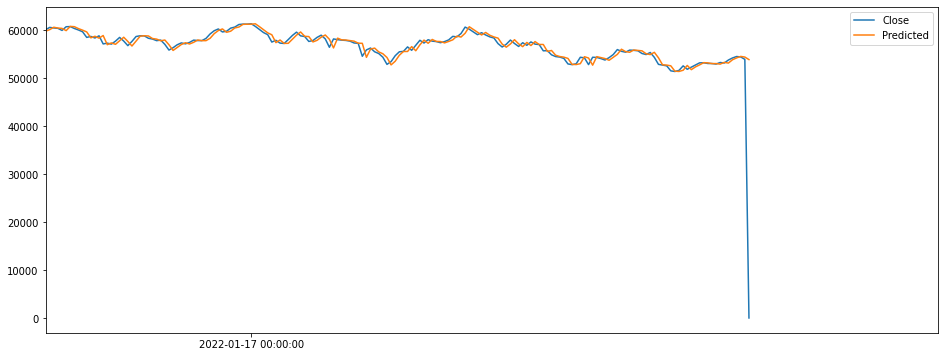

In [ ]:
y_Predict.plot(figsize=(16,6))
plt.xlim(750,)

In [ ]:
y_test.plot(figsize=(16,6))

NameError: name 'y_test' is not defined

In [ ]:
#Printing the coefficient of determination (Useless)
model.score(X_test, y_test)

0.9591579486868568